# 캐글 - 타이타닉 탑승자 데이터

#### https://www.kaggle.com/c/titanic/data

## 데이터 상세

변수명|설명
-|-
PassengerId|탑승자 데이터 일련번호
Survived|생존 여부(0 = 사망, 1 = 생존)
Pclass|티켓의 선실 등급(1 = 일등석, 2 = 이등석, 3 = 삼등석)
Name|탑승자 이름
Sex|탑승자 성별
Age|탑승자 나이
SibSp|같이 탑승한 형제자매 또는 배우자 인원수
Parch|같이 탑승한 부모님 또는 어린이 인원수
Ticket|티켓 번호
Fare|요금
Cabin|선실 번호
Embarked|중간 정착 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [2]:
print('### 학습 데이터 정보 ###')
print(df.info())

### 학습 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- 891개의 row, 12개의 column
- Age, Cabin, Embarked 칼럼은 결측치 존재

In [3]:
# null 값을 Age칼럼은 평균 나이, Cabin, Embarked 칼럼은 N값으로 변경

df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Cabin'].fillna('N', inplace = True)
df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null값 개수: ', df.isnull().sum().sum())

데이터 세트 Null값 개수:  0


In [8]:
# object 타입인 Sex, Cabin, Embarked 칼럼의 값 분류 확인

print('Sex 값 분포: \n', df['Sex'].value_counts())
print()
print('Cabin 값 분포: \n', df['Cabin'].value_counts())
print()
print('Embarked 값 분포: \n', df['Embarked'].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin 칼럼의 경우 알파벳+숫자로 이루어져 있는데 이 중 가장 앞 글자인 첫번째 알파벳이 중요해보임
- Cabin 칼럼의 앞문자만 추출

In [9]:
df['Cabin'] = df['Cabin'].str[:1]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


#### 1. 어떤 유형의 승객의 생존 확률이 높을까?

- 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수 비교

In [10]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- Survived 칼럼의 경우 0은 사망, 1은 생존
- 탑승객 중 남자는 577명, 여자는 314명
- 남자의 경우 577명 중 468명이 죽고 109명이 살아남아 약 18.8% 생존
- 여자의 경우 314명 중 81명이 죽고 233명이 살아남아 약 74.2% 생존

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

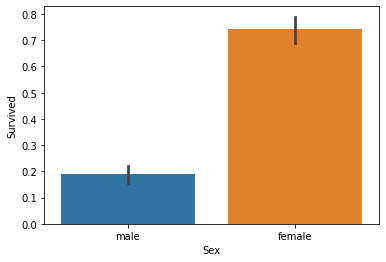

In [11]:
sns.barplot(x = 'Sex', y = 'Survived', data = df)

- 부자와 가난한 사람 간의 생존 확률
- 객실 등급을 기준으로 생존확률 확인

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

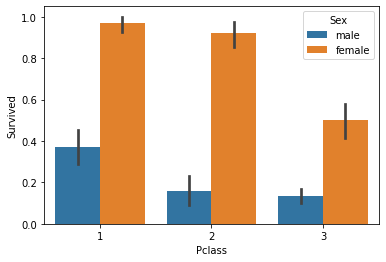

In [12]:
# 객실 등급별 성별에 따른 생존 확률

sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df)

- 1 > 2 > 3등실의 순으로 생존 확률이 높음

- Age에 따른 생존 확률
- Age의 경우 값의 종류가 많으므로 범위별로 분류해 카테고리 값을 할당

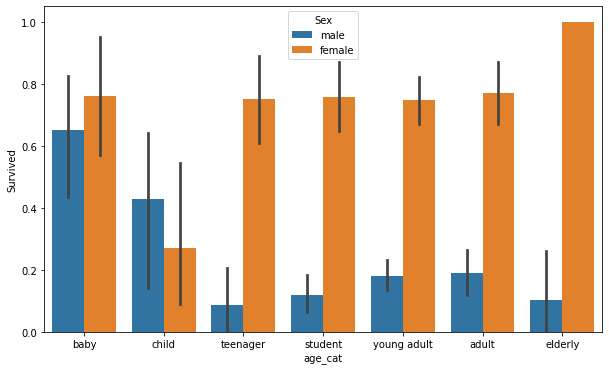

In [16]:
def get_category(age):
    cat = ''
    if age <= 5:
        cat = 'baby'
    elif age <= 12:
        cat = 'child'
    elif age <= 18:
        cat = 'teenager'
    elif age <= 25:
        cat = 'student'
    elif age <= 35:
        cat = 'young adult'
    elif age <= 60:
        cat = 'adult'
    else:
        cat = 'elderly'
    return cat

# 막대 그래프의 크기 설정
plt.figure(figsize = (10, 6))

# x축 값을 순차적으로 표시하기 위한 설정
group_names = ['baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'elderly']

df['age_cat'] = df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'age_cat', y = 'Survived', hue = 'Sex', data = df, order = group_names)
df.drop('age_cat', axis = 1, inplace = True)

- 여성의 경우 child를 제외하고는 모두 생존확률이 높음. 특히 elderly 여성의 경우 생존확률 매우 높음
- 하지만 child 여성의 경우 생존확률이 낮음
- 남성의 경우 baby, child는 생존확률이 높으나 나머지 연령대에서는 생존확률이 낮음

- 위에서 살펴본 바에 의하면 Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처임

#### 문자열 카테고리 피처를 숫자형 카테고리로 변환

In [18]:
from sklearn.preprocessing import LabelEncoder

def encode_features(datadf):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(datadf[feature])
        datadf[feature] = le.transform(datadf[feature])
    return datadf

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


## 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 재소용할 수 있도록 생성

In [22]:
# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    return df

# 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

### 데이터 전처리를 수행하는 transform_features()함수를 생성했으니 이 함수를 이용해 다시 원본 데이터 가공
- 원본 csv파일을 다시 로딩 후
- 타이타닉 생존자 데이터 세트의 레이블인 Survived 속성만 별도 분리해 클래스 결정값 데이터 세트로 생성
- 그리고 Survived 속성을 드롭해 피처 데이터 세트 생성
- 이렇게 생성된 피처 데이터 세트에 transform_features()를 적용해 데이터 가공

In [23]:
df = pd.read_csv('train.csv')
y = df['Survived']
X = df.drop('Survived', axis = 1)

X = transform_features(X)

In [24]:
# 별도의 테스트 데이터 세트 추출(20%)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

### 머신러닝 알고리즘인 결정트리, 랜덤포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측

- 예측 성능 평가: 정확도

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear')     # solver = 'liblinear': 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정
                                    # 일반적으로 작은 데이터 세트에서의 이진 분류는 liblinear가 성능이 약간 더 좋은 경향이 있음
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


- 3개의 알고리즘 중 로지스틱 회귀가 다른 알고리즘에 비해 높은 정확도를 보임

#### 교차 검증으로 결정 트리 모델을 좀 더 평가

- 교차 검증을 위한 사이킷런 model_selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용

In [27]:
# 사이킷런의 KFold 클래스를 이용해 교차 검증 수행(폴드 개수 = 5개)

from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X)):
        # X데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))     # {1:.4f}: {index(생략가능): .표기할자릿수f}
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
    
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


- 평균 정확도는 약 78.23%

In [28]:
# 교차 검증을 cross_val_score()를 이용해 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X, y, cv = 5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


- 평균 정확도는 약 78.79%
- k폴드의 평균정확도와 cross_val_score()의 평균정확도가 약간 다른 이유는 cross_val_score()가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문

In [29]:
# GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼파라미터를 찾고 예측 성능을 측정

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


- 최적화된 하이퍼파라미터인 max_depth = 3, min_samples_leaf = 5, min_samples_split = 2로 DecisionTreeClassifier를 학습시킨 뒤 예측 정확도가 약 87.15%로 향상됨
- 하이퍼 파라미터 변경 전보다 약 8%이상이 증가함